<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Remove-columns-with-many-nulls" data-toc-modified-id="Remove-columns-with-many-nulls-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Remove columns with many nulls</a></span></li><li><span><a href="#make-all-float64-to-float32" data-toc-modified-id="make-all-float64-to-float32-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>make all float64 to float32</a></span></li><li><span><a href="#Check-if-float-columns-are-discrete" data-toc-modified-id="Check-if-float-columns-are-discrete-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Check if float columns are discrete</a></span></li><li><span><a href="#date-time-columns" data-toc-modified-id="date-time-columns-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>date time columns</a></span></li><li><span><a href="#Create-new-columns" data-toc-modified-id="Create-new-columns-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Create new columns</a></span></li><li><span><a href="#Hidden-Continuous-features" data-toc-modified-id="Hidden-Continuous-features-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Hidden Continuous features</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Binning-Continuous-Values" data-toc-modified-id="Binning-Continuous-Values-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Binning Continuous Values</a></span></li></ul></li><li><span><a href="#Risk-Analysis" data-toc-modified-id="Risk-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Risk Analysis</a></span><ul class="toc-item"><li><span><a href="#PD-model-data-preparation" data-toc-modified-id="PD-model-data-preparation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PD model data preparation</a></span></li><li><span><a href="#split-the-train-test-data" data-toc-modified-id="split-the-train-test-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>split the train test data</a></span></li><li><span><a href="#Create-dummy-variables" data-toc-modified-id="Create-dummy-variables-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Create dummy variables</a></span></li></ul></li><li><span><a href="#Write-the-datafile" data-toc-modified-id="Write-the-datafile-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Write the datafile</a></span></li></ul></div>

# Description

**General Introduction**  

This project uses the data from [LendingClub](https://www.lendingclub.com/) website data which was collected by Kaggle user [Wendy Kan](https://www.kaggle.com/wendykan/lending-club-loan-data).


**Wikipedia Introduction**
- https://www.wikiwand.com/en/LendingClub  


LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015.

LendingClub enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

**Dataset Introduction**  
These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file.


![](../data/loan_stats_1.png)
![](../data/loan_stats_2.png)
![](../data/loan_stats_3.png)

![](../data/browse_notes_1.png)
![](../data/browse_notes_2.png)
![](../data/browse_notes_3.png)
![](../data/browse_notes_4.png)

![](../data/reject_status_1.png)

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100
np.random.seed(SEED)

[(x.__name__,x.__version__) for x in [np,pd,sns]]

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[('numpy', '1.18.1'), ('pandas', '1.0.1'), ('seaborn', '0.9.0')]

In [2]:
pd.options.display.max_columns=None

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
import sys # sys.getsizeof(df)

# Load the data

In [5]:
!du -sh ../data/loan.csv

1.1G	../data/loan.csv


In [6]:
# our data is huge, 1.1GB be careful when loading with pandas.

In [7]:
!head -1 ../data/loan.csv

In [8]:
!head -1 ../data/loan.csv

In [9]:
tmp = pd.read_csv('../data/loan.csv',nrows=5)

print(tmp.shape)
tmp

(5, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,16901,2,2,1,2,2,12560,69,2,7,2137,28,42000,1,11,2,9,1878,34360,5.9,0,0,140,212,1,1,0,1,NaN,2,NaN,0,2,5,3,3,16,7,18,5,9,0,0,0,3,100.0,0,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1208,321915,4,4,2,3,3,87153,88,4,5,998,57,50800,2,15,2,10,24763,13761,8.3,0,0,163,378,4,3,3,4,NaN,4,NaN,0,2,4,4,9,27,8,14,4,13,0,0,0,6,95.0,0,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14,7150,72,0,2,0,35,24100,1,5,0,4,1

In [10]:
tmp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 145 entries, id to settlement_term
dtypes: float64(59), int64(63), object(23)
memory usage: 12.3 KB


In [11]:
"""
we do not need some columns.

'id', 'member_id', 'url', 'desc', 'zip_code'

Also, we see lots of nans, we will analyze nans later on full data 
and drop column if they have more than 60% fo nans.

""";

In [12]:
exclude = ['id', 'member_id', 'url', 'desc', 'zip_code']
columns = [i for i in tmp.columns if i not in exclude]

# columns

In [13]:
%%time
df = pd.read_csv('../data/loan.csv',usecols=columns,low_memory=False)
print(df.shape)
df.info(memory_usage='deep')

(2260668, 140)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 140 entries, loan_amnt to settlement_term
dtypes: float64(102), int64(4), object(34)
memory usage: 5.6 GB
CPU times: user 4min 37s, sys: 8.61 s, total: 4min 46s
Wall time: 7min 4s


In [14]:
df.tail(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260666,12000,12000,12000.0,60 months,21.45,327.69,D,D5,NaN,NaN,RENT,60000.0,Not Verified,Oct-2017,Current,n,debt_consolidation,Debt consolidation,AK,30.82,2.0,Jul-2003,1.0,7.0,NaN,8.0,0.0,12927,34.9,17.0,w,9924.69,9924.69,5207.29,5207.29,2075.31,3131.98,0.0,0.0,0.0,Feb-2019,327.69,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,535.0,65238.0,2.0,4.0,2.0,3.0,4.0,52311.0,64.0,1.0,2.0,2406.0,55.0,37000.0,0.0,12.0,4.0,5.0,8155.0,18789.0,14.6,0.0,0.0,170.0,67.0,4.0,4.0,0.0,16.0,9.0,5.0,7.0,0.0,2.0,3.0,2.0,3.0,12.0,4.0,5.0,3.0,8.0,0.0,0.0,0.0,3.0,88.2,0.0,0.0,0.0,118975.0,65238.0,22000.0,81975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260667,16550,16550,16550.0,60 months,21.45,451.94,D,D5,BABYSITTER,3 years,RENT,60000.0,Not Verified,Oct-2017,Current,n,credit_card,Credit card refinancing,NY,18.40,0.0,Apr-2014,1.0,NaN,NaN,13.0,0.0,25760,50.8,14.0,w,13541.01,13541.01,7355.50,7355.50,3008.99,4346.51,0.0,0.0,0.0,Feb-2019,500.00,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,25760.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,3.0,8.0,6158.0,51.0,50700.0,0.0,0.0,2.0,8.0,1982.0,9816.0,49.7,0.0,0.0,NaN,41.0,3.0,3.0,0.0,10.0,NaN,0.0,NaN,0.0,5.0,12.0,5.0,5.0,0.0,13.0,14.0,12.0,13.0,0.0,0.0,0.0,3.0,100.0,20.0,0.0,0.0,50700.0,25760.0,19500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

## Remove columns with many nulls

In [15]:
%%time
df = df.dropna(axis=1, thresh=int(0.6*len(df)))
print(df.shape)
sys.getsizeof(df) / 1024/1024

(2260668, 98)
CPU times: user 2min 25s, sys: 1.87 s, total: 2min 27s
Wall time: 3min 14s


4301.745718955994

In [16]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Feb-2019,0.0,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,12560.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Feb-2019,0.0,1,Individual,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,87153.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N


## make all float64 to float32

In [17]:
col_floats = df.select_dtypes(np.float64).columns
for col in col_floats:
    df[col] = df[col].astype(np.float32)

In [18]:
col_ints = df.select_dtypes(np.int64).columns
for col in col_ints:
    df[col] = df[col].astype(np.int32)

In [19]:
sys.getsizeof(df) / 1024/1024

3637.7158880233765

In [20]:
# %%time
# df_copy = df.copy(deep=True)

CPU times: user 433 ms, sys: 279 ms, total: 711 ms
Wall time: 821 ms


In [21]:
# df = df_copy.copy(deep=True)

In [22]:
# look at unique elements

df.select_dtypes('object').nunique()

term                         2
grade                        7
sub_grade                   35
emp_title               512694
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
loan_status                  9
pymnt_plan                   2
purpose                     14
title                    63155
addr_state                  51
earliest_cr_line           754
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

In [23]:
cat_low = df.select_dtypes('object').nunique()[lambda x: x<12].index

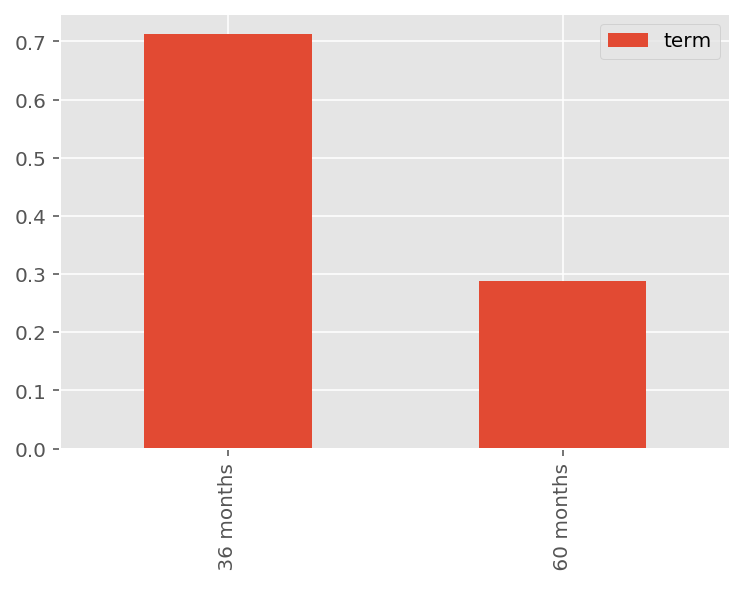

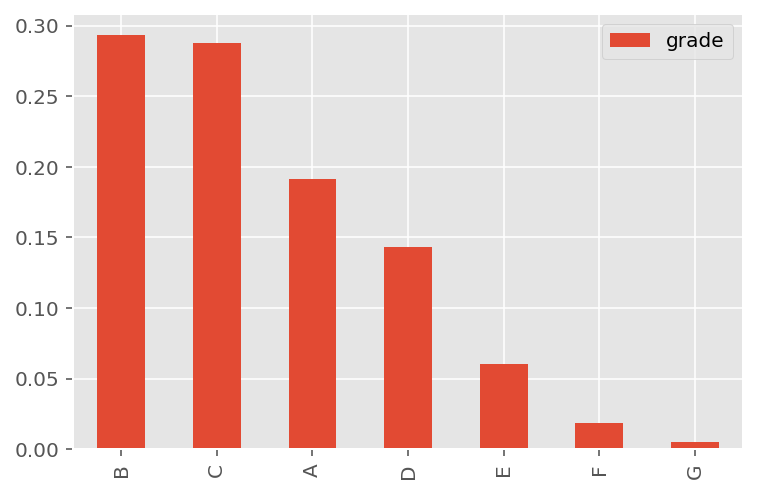

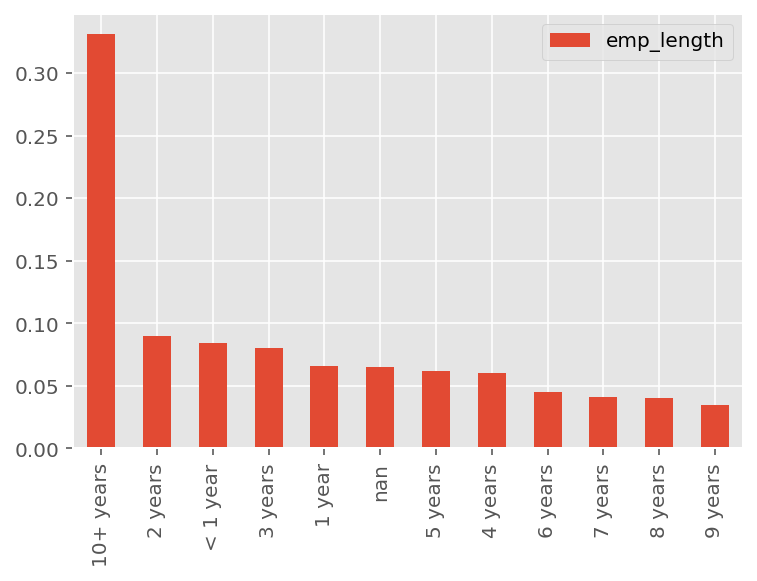

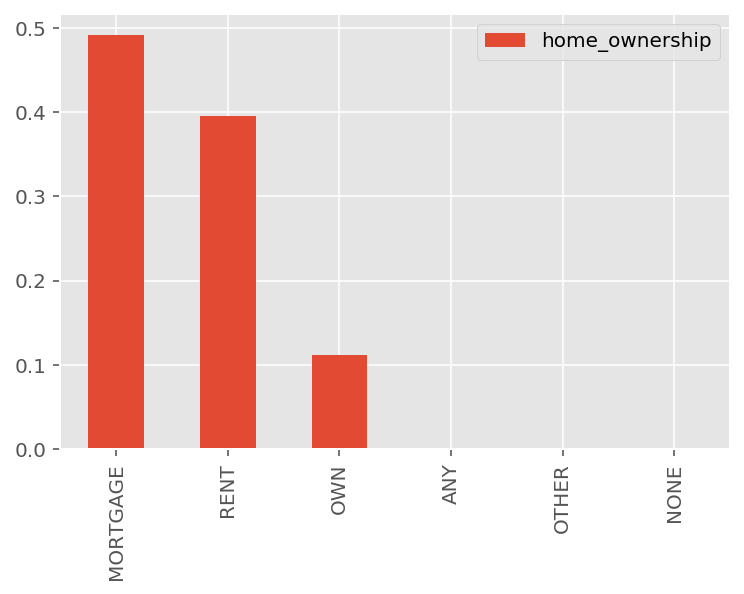

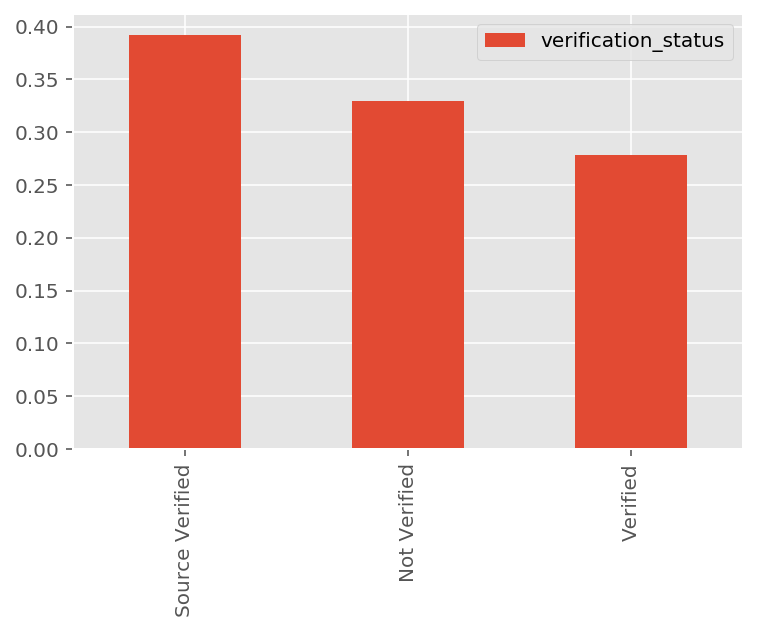

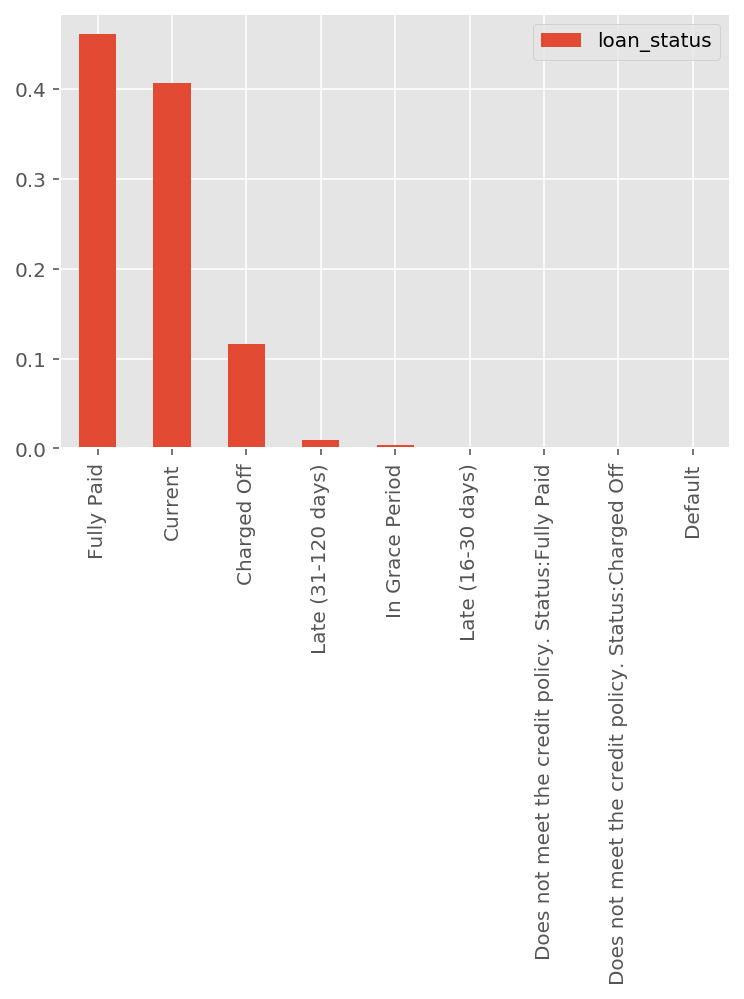

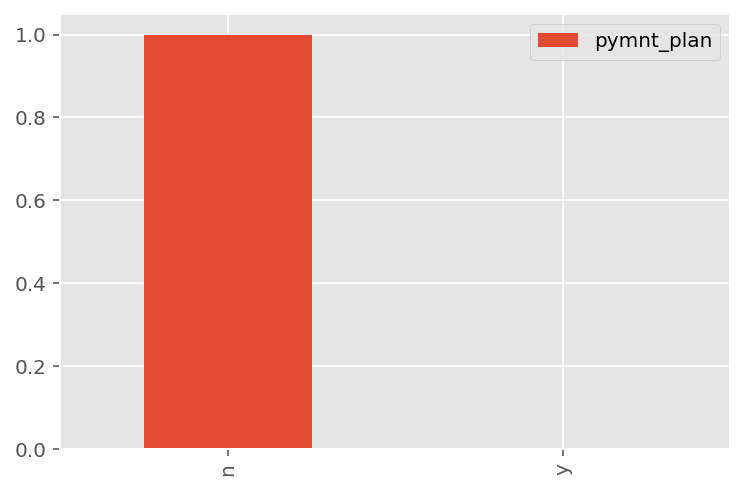

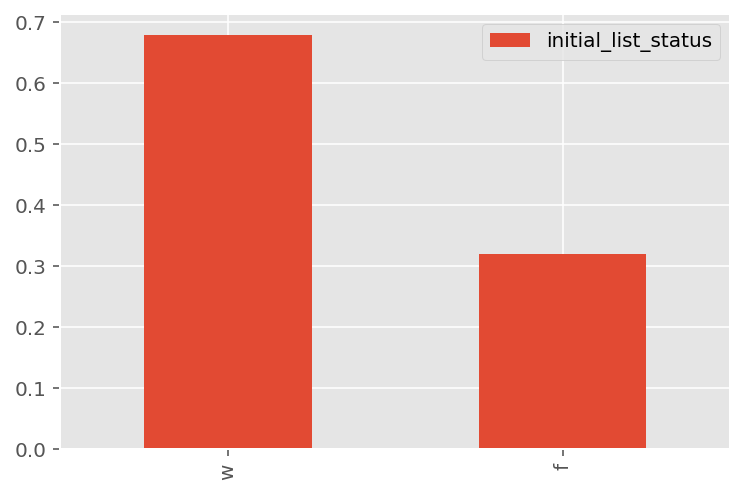

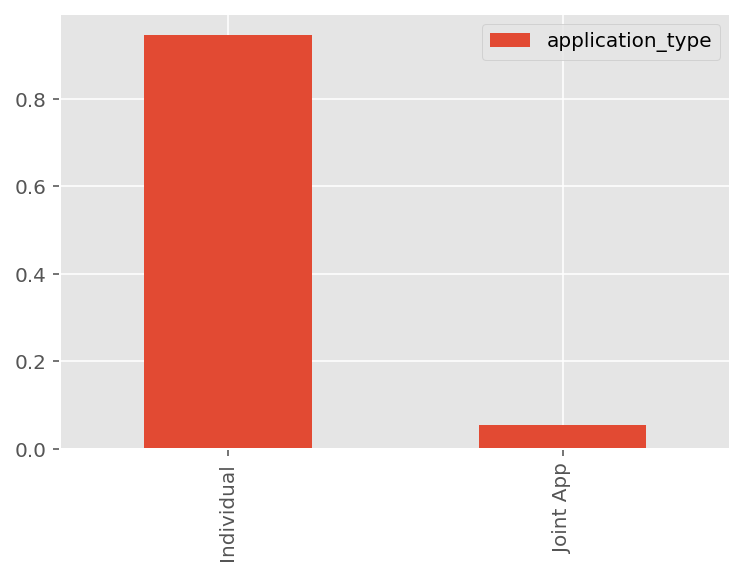

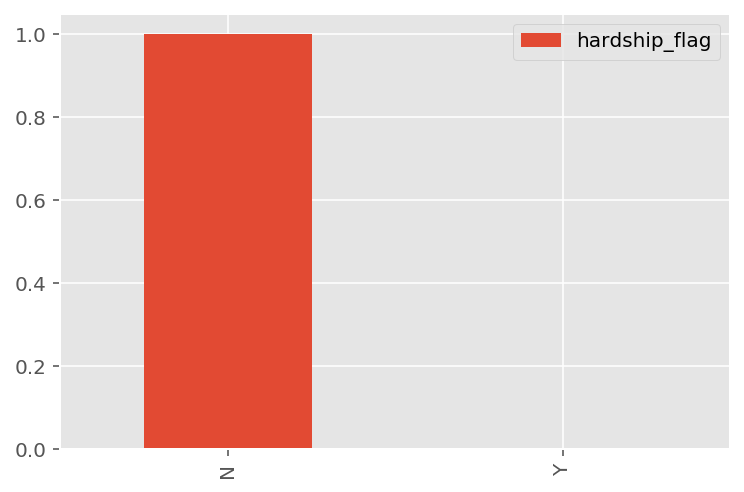

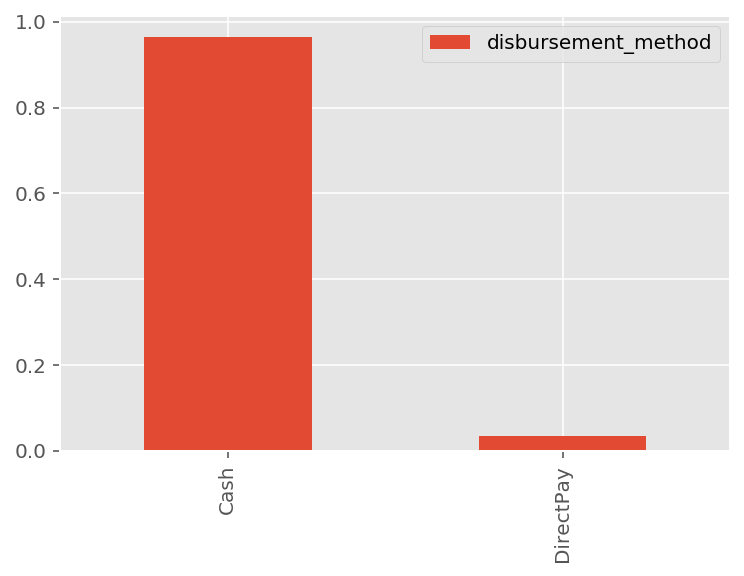

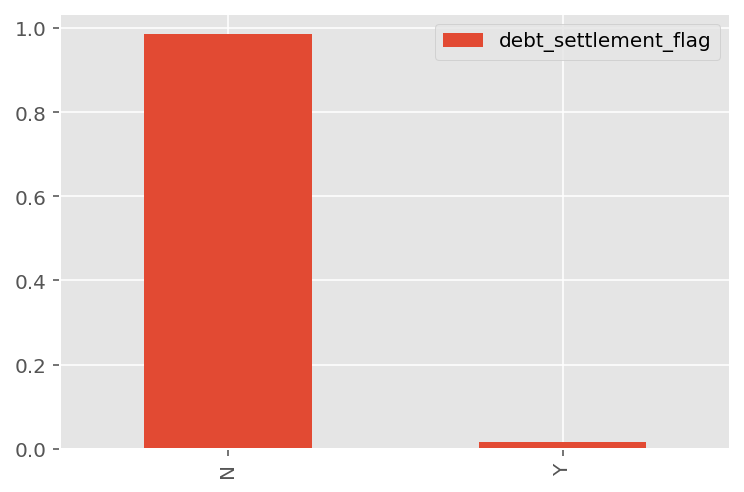

In [24]:
for cat in cat_low:
    df[cat].value_counts(normalize=True,
                         dropna=False).to_frame().plot.bar()

## Check if float columns are discrete

In [25]:
infrequent_floats = df.select_dtypes('float32')\
  .nunique()[lambda x: x<40]

possible_cats = infrequent_floats.index
infrequent_floats

delinq_2yrs                   37
inq_last_6mths                28
collections_12_mths_ex_med    16
acc_now_delinq                 9
open_acc_6m                   19
open_il_12m                   19
open_il_24m                   31
open_rv_12m                   29
inq_fi                        33
chargeoff_within_12_mths      11
mths_since_recent_inq         26
num_tl_120dpd_2m               7
num_tl_30dpd                   5
num_tl_90g_dpd_24m            34
num_tl_op_past_12m            33
pub_rec_bankruptcies          12
dtype: int64

In [26]:
infrequent_floats = df.select_dtypes('float32')\
  .nunique()[lambda x: ((x<40) & (x>2))]

possible_cats = infrequent_floats.index
infrequent_floats

delinq_2yrs                   37
inq_last_6mths                28
collections_12_mths_ex_med    16
acc_now_delinq                 9
open_acc_6m                   19
open_il_12m                   19
open_il_24m                   31
open_rv_12m                   29
inq_fi                        33
chargeoff_within_12_mths      11
mths_since_recent_inq         26
num_tl_120dpd_2m               7
num_tl_30dpd                   5
num_tl_90g_dpd_24m            34
num_tl_op_past_12m            33
pub_rec_bankruptcies          12
dtype: int64

In [27]:
# look at the number distribution

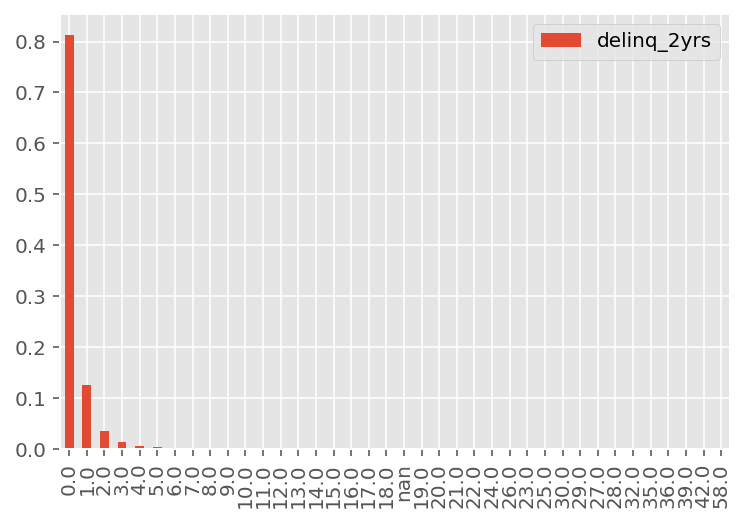

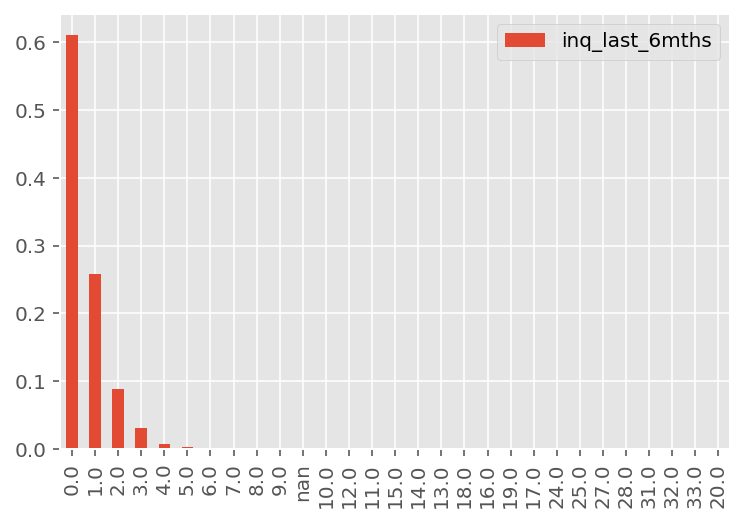

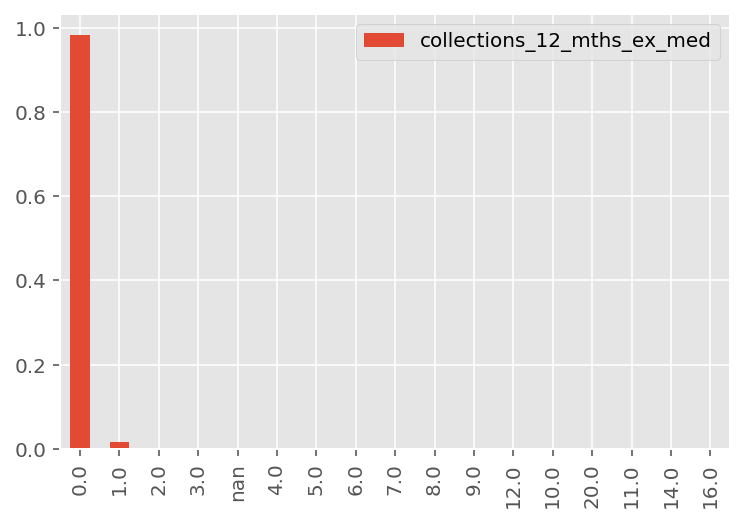

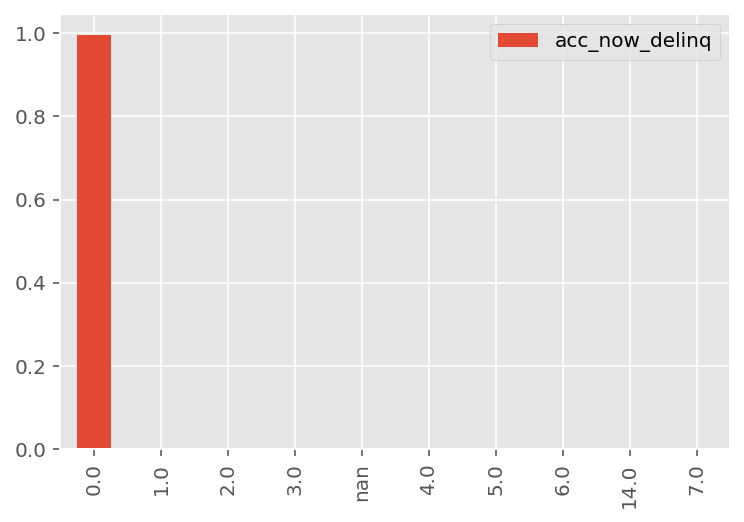

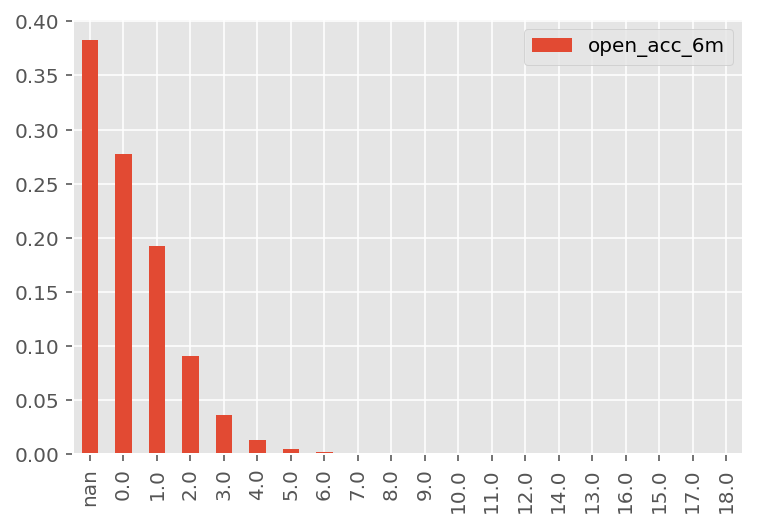

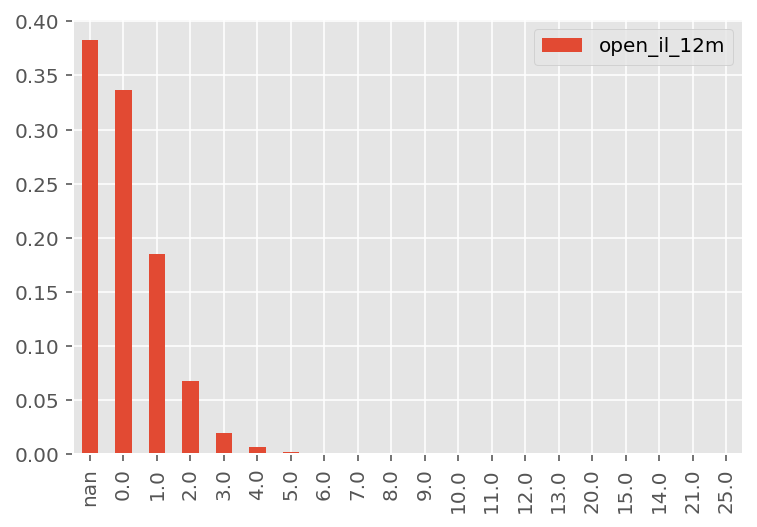

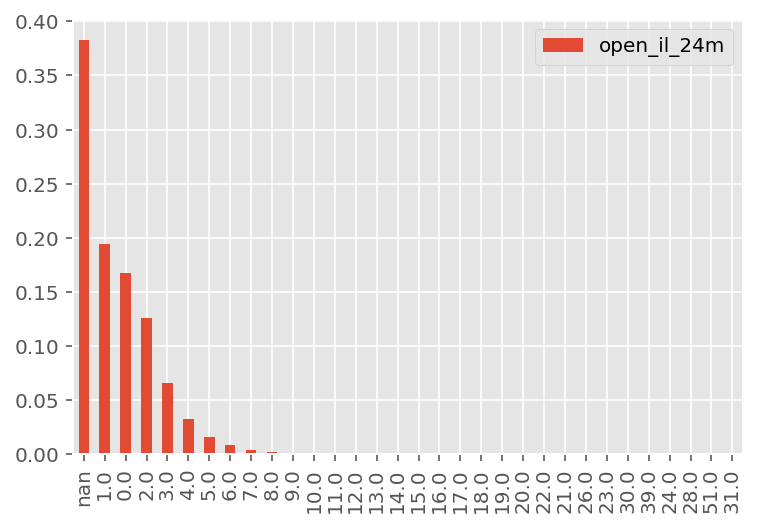

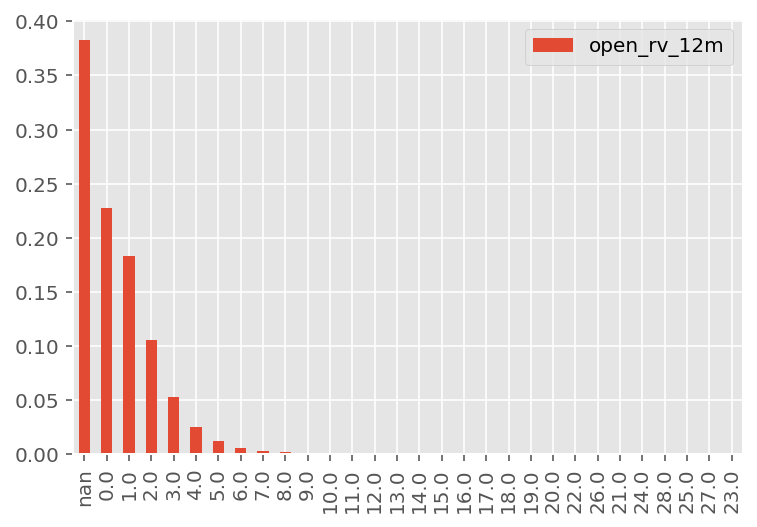

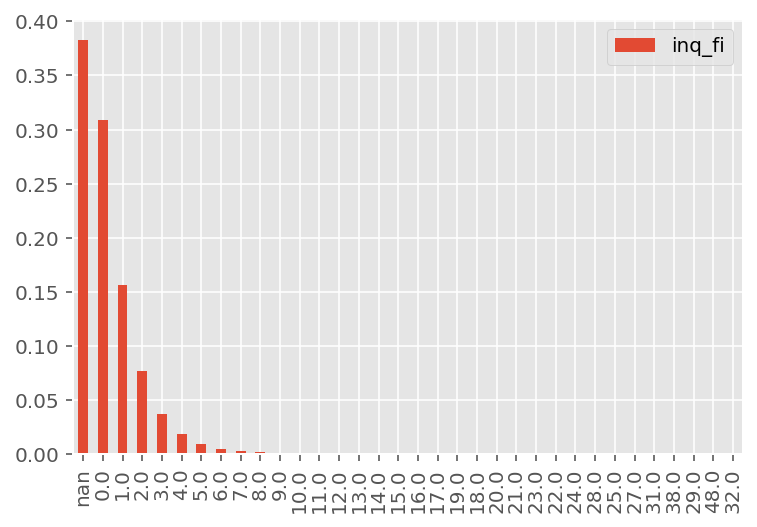

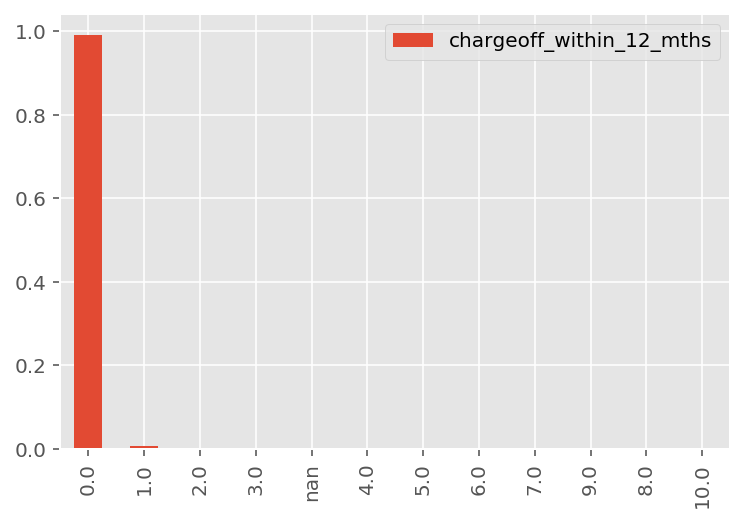

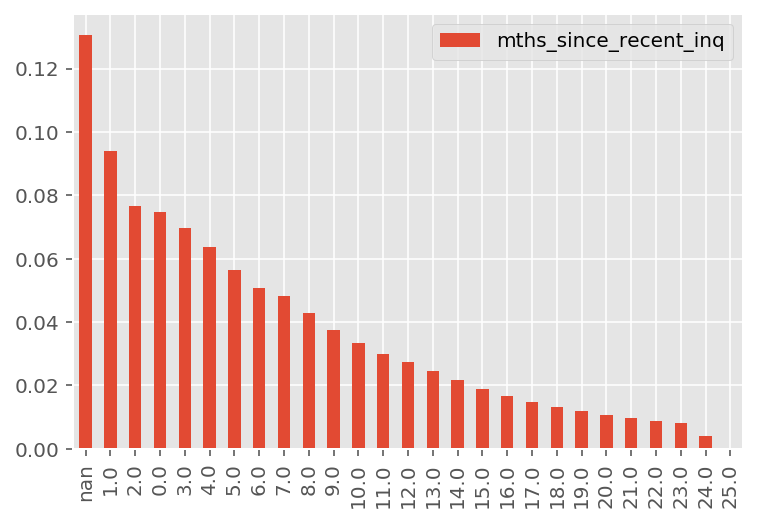

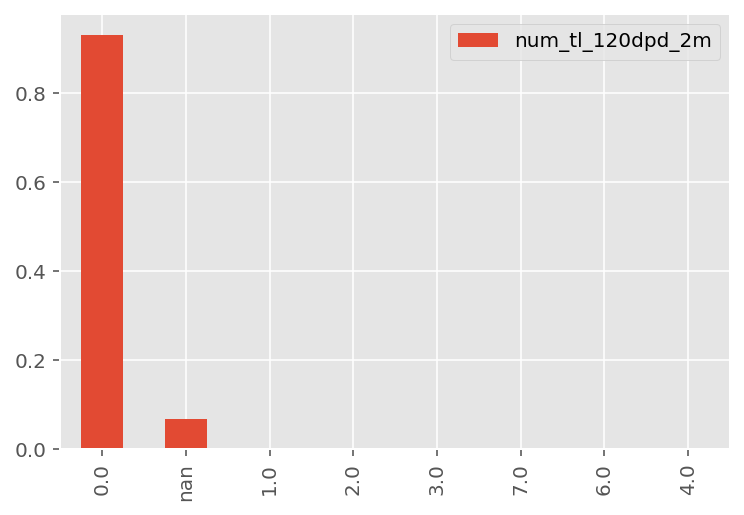

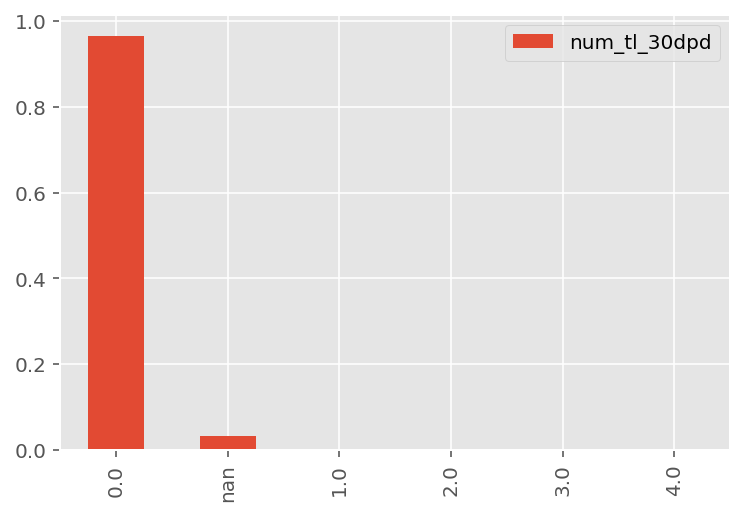

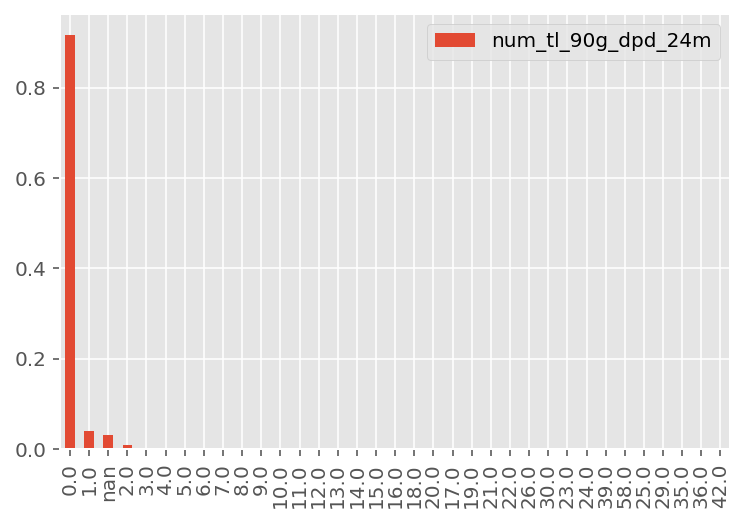

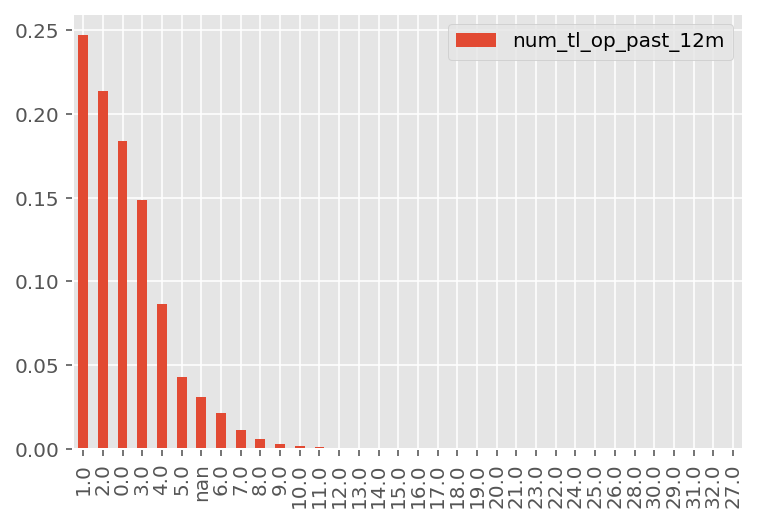

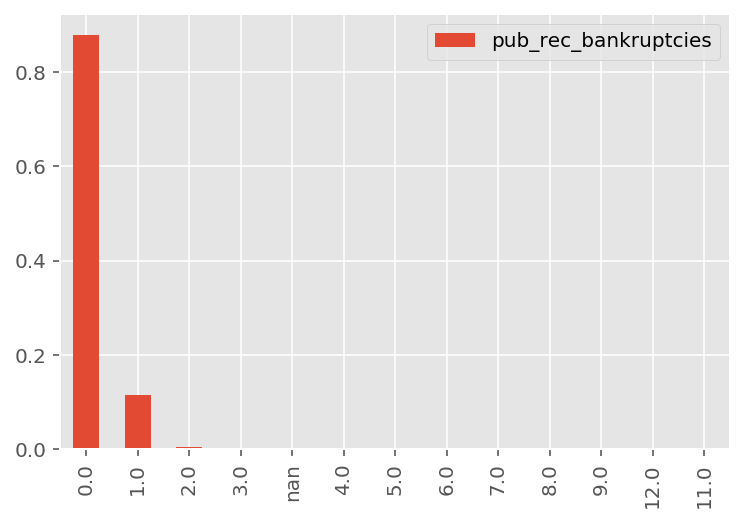

In [28]:
for cat in possible_cats: df[cat].value_counts(normalize=True,dropna=False)\
    .to_frame().plot.bar();

## date time columns

In [29]:
df.select_dtypes('object').head(2).T

,0,1
term,36 months,60 months
grade,C,D
sub_grade,C1,D2
emp_title,Chef,Postmaster
emp_length,10+ years,10+ years
home_ownership,RENT,MORTGAGE
verification_status,Not Verified,Source Verified
issue_d,Dec-2018,Dec-2018
loan_status,Current,Current
pymnt_plan,n,n


In [30]:
cols_date = ['issue_d',
             'earliest_cr_line',
             'last_pymnt_d',
             'last_credit_pull_d']

for col in cols_date:
    df[col] = pd.to_datetime(df[col],format='%b-%Y',errors='coerce')

In [31]:
df[cols_date].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [32]:
df[cols_date].head(2)

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2018-12-01,2001-04-01,2019-02-01,2019-02-01
1,2018-12-01,1987-06-01,2019-02-01,2019-02-01


In [33]:
# create issue month and issue year
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

In [34]:
# df_copy = df.copy(deep=True)

## Create new columns

In [35]:
df[cols_date].max()

issue_d              2018-12-01
earliest_cr_line     2015-11-01
last_pymnt_d         2019-02-01
last_credit_pull_d   2019-03-01
dtype: datetime64[ns]

In [36]:
max_date = df[cols_date].max().max()
max_date

Timestamp('2019-03-01 00:00:00')

In [37]:
df['earliest_cr_line'].isnull().sum()

29

In [38]:
df['months_since_earliest_cr_line'] = round(
(max_date - df['earliest_cr_line'])/ np.timedelta64(1,'M')
)

In [39]:
df.iloc[:2,-2:]

,issue_year,months_since_earliest_cr_line
0,2018,215.0
1,2018,381.0


In [40]:
df['months_since_earliest_cr_line'].describe().round(2)

count    2260639.00
mean         230.69
std           94.17
min           40.00
25%          166.00
50%          215.00
75%          280.00
max         1032.00
Name: months_since_earliest_cr_line, dtype: float64

In [41]:
df['loan_income_ratio']= df['loan_amnt']/df['annual_inc']

df.iloc[:2,-2:]

,months_since_earliest_cr_line,loan_income_ratio
0,215.0,0.045455
1,381.0,0.333333


## Hidden Continuous features

In [42]:
# %%time
# df_copy = df.copy(deep=True)

CPU times: user 922 ms, sys: 886 ms, total: 1.81 s
Wall time: 2.71 s


In [43]:
# df = df_copy.copy(deep=True)

In [44]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_month,issue_year,months_since_earliest_cr_line,loan_income_ratio
0,2500,2500,2500.0,36 months,13.560000,84.919998,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,NY,18.24,0.0,2001-04-01,1.0,9.0,1.0,4341,10.300000,34.0,w,2386.02002,2386.02002,167.020004,167.020004,113.980003,53.040001,0.0,0.0,0.0,2019-02-01,84.919998,2019-02-01,0.0,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,12560.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N,12,2018,215.0,0.045455
1,30000,30000,30000.0,60 months,18.940001,777.229980,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,LA,26.52,0.0,1987-06-01,0.0,13.0,1.0,12315,24.200001,44.0,w,29387.75000,29387.75000,1507.109985,1507.109985,612.250000,894.859985,0.0,0.0,0.0,2019-02-01,777.229980,2019-02-01,0.0,1,Individual,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,87153.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N,12,2018,381.0,0.333333


In [45]:
df['term'].value_counts(dropna=False)

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

In [46]:
df['term'].unique()

# note the leading whitespaces

array([' 36 months', ' 60 months'], dtype=object)

In [47]:
# this gives all NANS, since we have leading whitespaces.
# map_term = {'36 months': 36,'60 months': 60}
# df['term'] = df['term'].map(map_term)
# df['term'].value_counts(dropna=False)


In [48]:
df['term'] = df['term'].str.extract(r'(\d+)').astype(int)
df['term'].value_counts(dropna=False)

36    1609754
60     650914
Name: term, dtype: int64

In [49]:
df['emp_length'].value_counts(dropna=False)

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
NaN          146907
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [50]:
df['emp_length'] = df['emp_length']\
.str.replace('< 1years','0')\
.str.extract(r'(\d+)').astype(np.float32)

df['emp_length'].value_counts(dropna=False)

10.0    748005
1.0     338391
2.0     203677
3.0     180753
NaN     146907
5.0     139698
4.0     136605
6.0     102628
7.0      92695
8.0      91914
9.0      79395
Name: emp_length, dtype: int64

## Missing Values

In [51]:
pd.options.display.max_rows = 200

In [52]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_month,issue_year,months_since_earliest_cr_line,loan_income_ratio
0,2500,2500,2500.0,36,13.560000,84.919998,C,C1,Chef,10.0,RENT,55000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,NY,18.24,0.0,2001-04-01,1.0,9.0,1.0,4341,10.300000,34.0,w,2386.02002,2386.02002,167.020004,167.020004,113.980003,53.040001,0.0,0.0,0.0,2019-02-01,84.919998,2019-02-01,0.0,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,12560.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N,12,2018,215.0,0.045455
1,30000,30000,30000.0,60,18.940001,777.229980,D,D2,Postmaster,10.0,MORTGAGE,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,LA,26.52,0.0,1987-06-01,0.0,13.0,1.0,12315,24.200001,44.0,w,29387.75000,29387.75000,1507.109985,1507.109985,612.250000,894.859985,0.0,0.0,0.0,2019-02-01,777.229980,2019-02-01,0.0,1,Individual,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,87153.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N,12,2018,381.0,0.333333


In [53]:
df.head(2).loc[0,'all_util']

28.0

In [54]:
df.isnull().sum()[lambda x: x>0]\
.sort_values(ascending=False)\
.to_frame('n_missing')\
.assign(
feature = lambda dfx: dfx.index)\
.assign(
first_value = lambda dfx: df.loc[0,dfx['feature']])\
.assign(
percent = lambda dfx: dfx['n_missing']/df.shape[0]*100).round(2)\
.drop('feature',1)

,n_missing,first_value,percent
all_util,866348,28,38.32
inq_last_12m,866130,2,38.31
open_acc_6m,866130,2,38.31
total_cu_tl,866130,11,38.31
open_rv_12m,866129,2,38.31
inq_fi,866129,1,38.31
open_act_il,866129,2,38.31
open_il_12m,866129,1,38.31
open_il_24m,866129,2,38.31
total_bal_il,866129,12560,38.31


In [55]:
df.shape

(2260668, 102)

In [56]:
# we have large dataframe, we can drop nan rows if we have 
# small number of nans (eg < 500)
#
# but, data is precious
# I would rather impute them by mean/median/regression etc.

In [57]:
df.isnull().sum()[lambda x: x>0].shape

(68,)

In [58]:
missing_cols = df.isnull().sum()[lambda x: x>0].sort_values()\
.index.tolist()

df[missing_cols].head(2)

,loan_income_ratio,annual_inc,acc_now_delinq,months_since_earliest_cr_line,total_acc,pub_rec,delinq_amnt,open_acc,earliest_cr_line,delinq_2yrs,inq_last_6mths,last_credit_pull_d,tax_liens,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,dti,revol_util,last_pymnt_d,title,total_bal_ex_mort,acc_open_past_24mths,mort_acc,total_bc_limit,num_sats,num_bc_sats,num_tl_30dpd,num_actv_bc_tl,num_accts_ever_120_pd,num_bc_tl,total_il_high_credit_limit,mo_sin_rcnt_tl,num_il_tl,num_tl_90g_dpd_24m,tot_cur_bal,tot_coll_amt,tot_hi_cred_lim,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_op_past_12m,total_rev_hi_lim,num_op_rev_tl,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,num_rev_accts,avg_cur_bal,pct_tl_nvr_dlq,mths_since_recent_bc,bc_open_to_buy,percent_bc_gt_75,bc_util,mo_sin_old_il_acct,emp_length,num_tl_120dpd_2m,emp_title,mths_since_recent_inq,max_bal_bc,open_rv_24m,total_bal_il,open_il_24m,open_il_12m,open_act_il,inq_fi,open_rv_12m,total_cu_tl,open_acc_6m,inq_last_12m,all_util
0,0.045455,55000.0,0.0,215.0,34.0,1.0,0.0,9.0,2001-04-01,0.0,1.0,2019-02-01,0.0,0.0,0.0,1.0,18.24,10.300000,2019-02-01,Debt consolidation,16901.0,9.0,0.0,36500.0,9.0,3.0,0.0,2.0,0.0,3.0,18124.0,1.0,16.0,0.0,16901.0,0.0,60124.0,5.0,5.0,3.0,42000.0,7.0,212.0,1.0,18.0,1878.0,100.0,1.0,34360.0,0.0,5.9,140.0,10.0,0.0,Chef,2.0,2137.0,7.0,12560.0,2.0,1.0,2.0,1.0,2.0,11.0,2.0,2.0,28.0
1,0.333333,90000.0,0.0,381.0,44.0,1.0,0.0,13.0,1987-06-01,0.0,0.0,2019-02-01,0.0,0.0,0.0,1.0,26.52,24.200001,2019-02-01,Debt consolidation,99468.0,10.0,3.0,15000.0,13.0,4.0,0.0,2.0,0.0,9.0,94072.0,3.0,27.0,0.0,321915.0,1208.0,372872.0,4.0,4.0,6.0,50800.0,8.0,378.0,4.0,14.0,24763.0,95.0,4.0,13761.0,0.0,8.3,163.0,10.0,0.0,Postmaster,4.0,998.0,5.0,87153.0,3.0,2.0,4.0,2.0,4.0,15.0,4.0,2.0,57.0


In [59]:
df['annual_inc'].value_counts(normalize=True).round(2).head()

60000.0    0.04
50000.0    0.03
65000.0    0.03
70000.0    0.03
80000.0    0.03
Name: annual_inc, dtype: float64

In [60]:
columns = ['feature','n_missing','top_value',
            'proportion','nunique']
df_missing = pd.DataFrame(columns=columns)

for col in missing_cols:
    x = df[col].value_counts(normalize=True).round(2)
    unq = df[col].nunique()
    n_missing = df[col].isnull().sum()
    df_missing.loc[len(df_missing)] = [col,n_missing,
                                       x.index[0],x.iloc[0],unq]

df_missing = df_missing.set_index('feature')
df_missing

,n_missing,top_value,proportion,nunique
feature,,,,
loan_income_ratio,4,0.2,0.02,232323
annual_inc,4,60000,0.04,89368
acc_now_delinq,29,0,1.00,9
months_since_earliest_cr_line,29,174,0.01,754
total_acc,29,20,0.04,152
pub_rec,29,0,0.84,43
delinq_amnt,29,0,1.00,2617
open_acc,29,9,0.09,91
earliest_cr_line,29,2004-09-01 00:00:00,0.01,754


In [61]:
df_missing[df_missing.proportion>0.80]

,n_missing,top_value,proportion,nunique
feature,,,,
acc_now_delinq,29,0,1.00,9
pub_rec,29,0,0.84,43
delinq_amnt,29,0,1.00,2617
delinq_2yrs,29,0,0.81,37
tax_liens,105,0,0.97,42
collections_12_mths_ex_med,145,0,0.98,16
chargeoff_within_12_mths,145,0,0.99,11
pub_rec_bankruptcies,1365,0,0.88,12
num_tl_30dpd,70276,0,1.00,5


In [62]:
df['delinq_amnt'] = df['delinq_amnt'].fillna(0)
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

In [63]:
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['funded_amnt'])

In [64]:
df_missing = df_missing.drop(['delinq_amnt','tot_coll_amt',
                             'total_rev_hi_lim'],axis=0)

In [65]:
df_missing[df_missing['top_value'].astype(str)
           .str.replace('.','')
           .str.isnumeric()]

,n_missing,top_value,proportion,nunique
feature,,,,
loan_income_ratio,4,0.2,0.02,232323
annual_inc,4,60000,0.04,89368
acc_now_delinq,29,0,1.00,9
months_since_earliest_cr_line,29,174,0.01,754
total_acc,29,20,0.04,152
pub_rec,29,0,0.84,43
open_acc,29,9,0.09,91
delinq_2yrs,29,0,0.81,37
inq_last_6mths,30,0,0.61,28


In [66]:
df.isna().sum()[lambda x: (x>0) & (x<50)]

annual_inc                        4
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   30
open_acc                         29
pub_rec                          29
total_acc                        29
acc_now_delinq                   29
months_since_earliest_cr_line    29
loan_income_ratio                 4
dtype: int64

In [67]:
drop_cols = df.isna().sum()[lambda x: (x>0) & (x<50)].index.tolist()
drop_cols

['annual_inc',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'acc_now_delinq',
 'months_since_earliest_cr_line',
 'loan_income_ratio']

In [68]:
# delete rows if num of nans < 50
for col in drop_cols:
    df = df.dropna(subset=[col],how='any')

df.isnull().sum()[lambda x: x>0]\
.sort_values(ascending=False).rename('n_missing')\
.to_frame()\
.assign(
percent = lambda dfx: dfx['n_missing']/df.shape[0]*100)

,n_missing,percent
all_util,866319,38.321881
open_rv_24m,866100,38.312193
max_bal_bc,866100,38.312193
open_acc_6m,866100,38.312193
open_act_il,866100,38.312193
open_il_12m,866100,38.312193
inq_last_12m,866100,38.312193
total_cu_tl,866100,38.312193
open_il_24m,866100,38.312193
total_bal_il,866100,38.312193


In [69]:
# fill numerical columns by means

In [70]:
cols_nums_missing = df_missing[df_missing['top_value'].astype(str)
           .str.replace('.','')
           .str.isnumeric()].index.tolist()

In [71]:
for col in cols_nums_missing:
    df[col] = df[col].fillna(df[col].mean())

In [72]:
df.isna().sum()[lambda x: (x>0)]

emp_title             166957
title                  23325
last_pymnt_d            2426
last_credit_pull_d        72
dtype: int64

In [73]:
# now I have only the catetorical columns, I will fill the nans
# by most frequent item.

In [74]:
cols_cat_missing = df.isna().sum()[lambda x: (x>0)].index.tolist()
cols_cat_missing

['emp_title', 'title', 'last_pymnt_d', 'last_credit_pull_d']

In [75]:
for col in cols_cat_missing:
    x = x = df[col].mode()[0]
    #print(x)
    df[col] = df[col].fillna(x)

In [76]:
df.isna().sum().sum()

0

## Binning Continuous Values

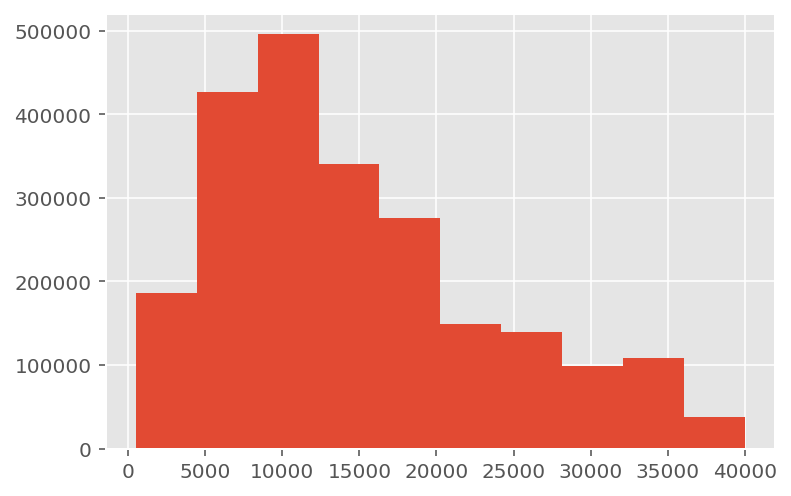

In [77]:
df['loan_amnt'].hist()

In [78]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]

labels = ['0-5000', '5000-10000', '10000-15000',
          '15000-20000', '20000-25000','25000 and above']

df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], bins, labels=labels)

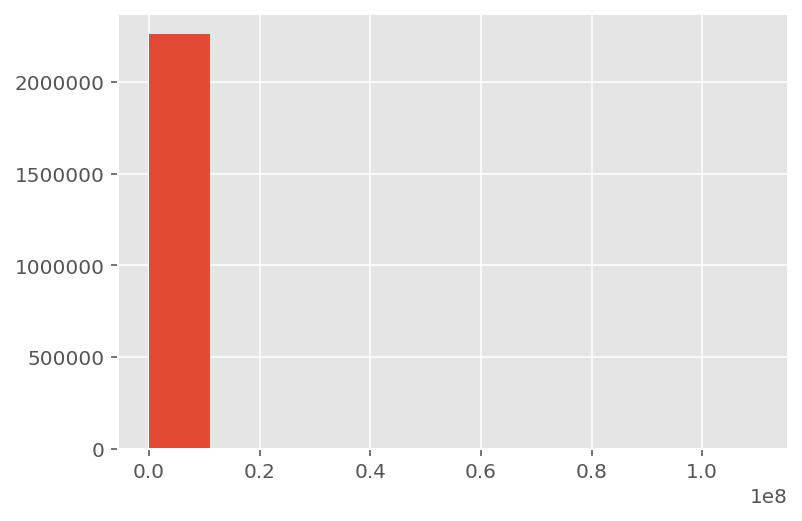

In [79]:
df['annual_inc'].hist()

In [80]:
# df['annual_inc'].describe()

In [81]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
labels = ['0-25000', '25000-50000', '50000-75000',
          '75000-100000', '100000 and above']

df['annual_inc_cat'] = pd.cut(df['annual_inc'], bins, labels=labels)

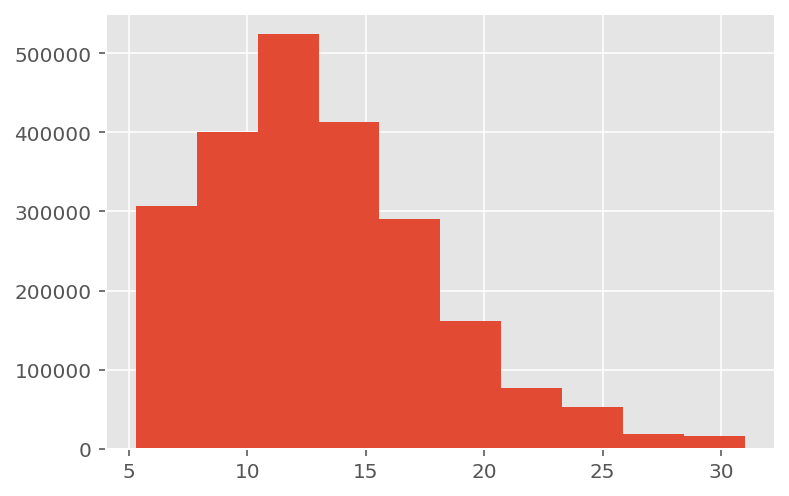

In [82]:
df['int_rate'].hist()

In [83]:
df['int_rate'].describe()

count    2.260638e+06
mean     1.309296e+01
std      4.832124e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [84]:
bins = [0, 10, 20, 30,40]
labels = ['0-10', '10-20', '20-30',
          '30-40']

df['int_rate_cat'] = pd.cut(df['int_rate'], bins, labels=labels)

In [85]:
df.isna().sum().sum()

2250

# Risk Analysis

## PD model data preparation

```
Expected Loss = Prof of Default * Loss Given Default * Exposuere at Default
EL = PD * LGD * EAD
```

Get good-bad definition:
```
may be defined: default = 90 days overdue


```

Logistic Regresion
```
ln(nonDefault/Default) = beta0 + beta1*x1 + ... + beta_m * x_m

```
Usually we want similar woe per group.

- [kaggle weight of evidence link](https://www.kaggle.com/pavansanagapati/weight-of-evidence-woe-information-value-iv)

![](../images/EL_formula.png)

![](../images/WOE_formula.png)
![](../images/WOE_example.png)

![](../images/IV_definition.png)
![](../images/IV_ranges.png)
![](../images/IV_example.png)

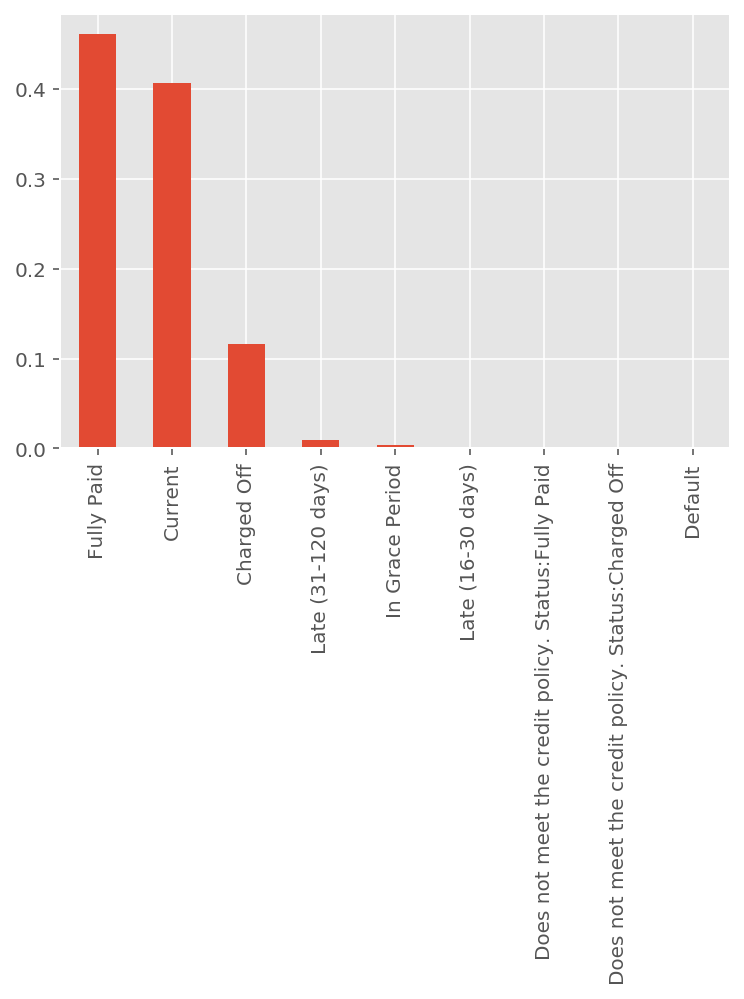

In [86]:
df['loan_status'].value_counts(normalize=True).plot.bar()

In [87]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [88]:
bad = ['Late (31-120 days)',
       'Charged Off',
       'Default',
       'Does not meet the credit policy. Status:Charged Off']
df['good_bad'] = np.where(df['loan_status'].isin(bad),0,1)

In [89]:
df['good_bad'].value_counts()

1    1976297
0     284341
Name: good_bad, dtype: int64

## split the train test data

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
target = 'good_bad'
Xtrain,Xtest,ytrain,ytest = train_test_split(
df.drop(target,1),df[target],
    train_size=0.8,
    shuffle=True,
    random_state=SEED
)

In [92]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

((1808510, 105), (452128, 105), (1808510,), (452128,))

## Create dummy variables

In [93]:
df.nunique()[lambda x: x==2]

term                    2
pymnt_plan              2
initial_list_status     2
application_type        2
hardship_flag           2
disbursement_method     2
debt_settlement_flag    2
good_bad                2
dtype: int64

In [94]:
df.nunique()[lambda x: (x>2) & (x<30)].sort_values()

verification_status            3
int_rate_cat                   4
annual_inc_cat                 5
loan_amnt_cat                  6
home_ownership                 6
num_tl_30dpd                   6
grade                          7
num_tl_120dpd_2m               8
acc_now_delinq                 9
loan_status                    9
emp_length                    11
chargeoff_within_12_mths      12
issue_month                   12
issue_year                    12
pub_rec_bankruptcies          13
purpose                       14
collections_12_mths_ex_med    17
open_acc_6m                   20
open_il_12m                   20
mths_since_recent_inq         27
inq_last_6mths                28
dtype: int64

In [95]:
df.select_dtypes('object').nunique().sort_values()

pymnt_plan                   2
initial_list_status          2
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
verification_status          3
home_ownership               6
grade                        7
loan_status                  9
purpose                     14
sub_grade                   35
addr_state                  51
title                    63141
emp_title               512681
dtype: int64

In [96]:
"""
Plan of dealing with categorical columns:
- if < 30, one hot encode
- if many numbers and frequency decreases make very low frequency 
  'others' and use ohe
  
- for important columns, use WOE and re-create categories.


woe: addr_state, home_ownership, verification_status, purpose,
     initial_list_status.
""";

In [97]:
df[['title','emp_title']].head(2)

,title,emp_title
0,Debt consolidation,Chef
1,Debt consolidation,Postmaster


In [98]:
# drop sub grade
del df['sub_grade']

In [99]:
small_cats = df.nunique()[lambda x: (x<30)].index.tolist()
print(small_cats)

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'inq_last_6mths', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'open_acc_6m', 'open_il_12m', 'chargeoff_within_12_mths', 'mths_since_recent_inq', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'pub_rec_bankruptcies', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'issue_month', 'issue_year', 'loan_amnt_cat', 'annual_inc_cat', 'int_rate_cat', 'good_bad']


In [100]:
cats_woe = ['addr_state', 'home_ownership']

small_cats = [i for i in small_cats if i not in cats_woe ]

print(small_cats)

['term', 'grade', 'emp_length', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'inq_last_6mths', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'open_acc_6m', 'open_il_12m', 'chargeoff_within_12_mths', 'mths_since_recent_inq', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'pub_rec_bankruptcies', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'issue_month', 'issue_year', 'loan_amnt_cat', 'annual_inc_cat', 'int_rate_cat', 'good_bad']


In [101]:
pd.get_dummies(df.head(2), columns=small_cats,drop_first=True).iloc[:2,-5:]

,annual_inc_cat_75000-100000,annual_inc_cat_100000 and above,int_rate_cat_10-20,int_rate_cat_20-30,int_rate_cat_30-40
0,0,0,1,0,0
1,1,0,1,0,0


In [102]:
# help(pd.get_dummies)

In [103]:
df = pd.get_dummies(df,columns=small_cats,drop_first=True)

In [ ]:
df.nunique()[lambda x: (x>30)].sort_values()

In [ ]:
cats_large = ['title','emp_title']

In [ ]:
# Look at the value counts of large cats, and make about 50
# categories, then use ordinal encoding.

In [ ]:
# for simplicity I am dropping these columns

del df['title']
del df['emp_title']

In [ ]:
def get_woe_iv(df1,feature_cat,target_bin,sort='woe'):
    """Calculate Weight of Evidence and Infomation Value.
    
    Parameters
    -----------
    df1: pandas.DataFrame
        Input dataframe having categorical feature and binary target.

    feature_cat: str
        Name of categorical column
    target_bin: str
        Name of binary target column.
        
    
    Returns:
    --------
    Returns dataframe with WOE, IV and other quantities.
    
    
    Example:
    --------
    df1 = get_woe_iv(df1,'grade','good_bad')
    """
    df1 = df1.groupby(feature_cat).agg(
        n_obs=(target_bin,'count'),
        prop_good=(target_bin,'mean'))

    df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

    df1['n_good'] = df1['prop_good'] * df1['n_obs']
    df1['n_bad'] = (1-df1['prop_good']) * df1['n_obs']

    df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

    df1['woe'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_woe'] = df1['woe'].diff().abs()

    df1['iv'] = ((df1['prop_n_good']-df1['prop_n_bad']
                 ) * df1['woe']
                ).sum()
    
    # reorder columns
    df1 = df1[['n_obs', 'prop_n_obs',
           'woe','iv',
            'n_good', 'n_bad',
            'prop_n_good','prop_n_bad',
            'prop_good',
            'diff_prop_good', 'diff_woe' ]]
    
    # sort values
    df1 = df1.sort_values(sort)
    df1 = df1.reset_index()

    return df1

df_woe = get_woe_iv(df,'grade','good_bad')
df_woe

In [ ]:
def plot_woe(df_woe,xrot=0,figsize=(18,6)):
    x = df_woe.iloc[:,0].to_numpy()
    y = df_woe['woe']
    plt.figure(figsize=figsize)
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0],fontsize=18)
    plt.ylabel('Weight of Evidence',fontsize=18)
    plt.xticks(rotation=xrot,fontsize=18,color='red')
    plt.yticks(fontsize=18)

df_woe = get_woe_iv(df,'grade','good_bad')
plot_woe(df_woe)

In [ ]:
df1 = pd.concat([Xtrain,ytrain],axis=1)
df2 = get_woe_iv(df1,'grade','good_bad')
display(df2)
plot_woe(df2)

In [ ]:
df1 = pd.concat([Xtrain,ytrain],axis=1)
df2 = get_woe_iv(df1,'home_ownership','good_bad')
display(df2)
plot_woe(df2)

In [ ]:
"""
Looking at woe for home ownership, we see 
none and other have very low woe value.

but we also see that there are less number of these items in
output dataframe.

so, we can combine less frequent categories into one category.

here other and none has low woe and any has iv, but
they are very low frequent, so we can combine them to single class.
""";

In [ ]:
df = pd.get_dummies(columns=['home_ownership'],data=df)

In [ ]:
df['home_ownership:RENT_OTHER_NONE_ANY'] = (
df['home_ownership_RENT'] +
df['home_ownership_OTHER'] +
df['home_ownership_NONE'] +
df['home_ownership_ANY']
)

df.iloc[:2,-2:]

In [ ]:
df2 = get_woe_iv(df1,'addr_state','good_bad')
display(df2)
plot_woe(df2,xrot=90,figsize=(24,12))

In [ ]:
"""
- sort the dataframe by woe
- go from left to right
- consider woe as well as n_obs
- if n_obs is distintly greater, make it own catetory.
- create categories of similar columns.
- Look for large columns, eg. califonia, NY, make them separate.


ia al ar ms la ok nv nm
hi sd
ny 
fl
mo md tn nc in nj
ca
pa ky va mi ak az mn oh
tx
ne ut ma de
wi
ri small but sandwitched between large n_obs
ga
il wy mt ks wa ct sc co nd or
wv nh dc vt id me


we already have columns for single states.
but, we need to create multiple state dummies.
""";

In [ ]:
df = pd.get_dummies(data=df,columns=['addr_state'])
df.iloc[:2,-52:]

In [ ]:
df['addr_state:ia_al_ar_ms_la_ok_nv_nm'] = (
    df['addr_state_IA'] +
    df['addr_state_AL'] +
    df['addr_state_AR'] +
    df['addr_state_MS'] +
    df['addr_state_LA'] +
    df['addr_state_OK'] +
    df['addr_state_NV'] +
    df['addr_state_NM']
)

In [ ]:
df['addr_state:hi_sd'] = (
    df['addr_state_HI'] +
    df['addr_state_SD'] 
)

In [ ]:
df['addr_state:ia_al_ar_ms_la_ok_nv_nm'] = (
    df['addr_state_MO'] +
    df['addr_state_MD'] +
    df['addr_state_TN'] +
    df['addr_state_NC'] +
    df['addr_state_IN'] +
    df['addr_state_NJ']
)

In [ ]:
df['addr_state:ia_al_ar_ms_la_ok_nv_nm'] = (
    df['addr_state_PA'] +
    df['addr_state_KY'] +
    df['addr_state_VA'] +
    df['addr_state_MI'] +
    df['addr_state_AK'] +
    df['addr_state_AZ'] +
    df['addr_state_MN'] +
    df['addr_state_OH']
)

In [ ]:
df['addr_state:ia_al_ar_ms_la_ok_nv_nm'] = (
    df['addr_state_NE'] +
    df['addr_state_UT'] +
    df['addr_state_MA'] +
    df['addr_state_DE']
)

In [ ]:
df['addr_state:ia_al_ar_ms_la_ok_nv_nm'] = (
    df['addr_state_IL'] +
    df['addr_state_WY'] +
    df['addr_state_MT'] +
    df['addr_state_KS'] +
    df['addr_state_WA'] +
    df['addr_state_CT'] +
    df['addr_state_SC'] +
    df['addr_state_CO'] +
    df['addr_state_ND'] +
    df['addr_state_OR']
)

In [ ]:
df['addr_state:ia_al_ar_ms_la_ok_nv_nm'] = (
    df['addr_state_WV'] +
    df['addr_state_NH'] +
    df['addr_state_DC'] +
    df['addr_state_VT'] +
    df['addr_state_ID'] +
    df['addr_state_ME']
)

# Write the datafile

In [ ]:
df.to_csv('../data/data_discrete_dummy.csv')